#**DBSCAN**


#Step 1 : Import Libraries



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

#Step 2 : Prepare dataset
###**use make blobs with different numbers**



In [3]:
X, y_true = make_blobs(n_samples=500, centers=4,
                       cluster_std=0.5, random_state=0)


#Step 3 : Modeling The Data Using DBSCAN



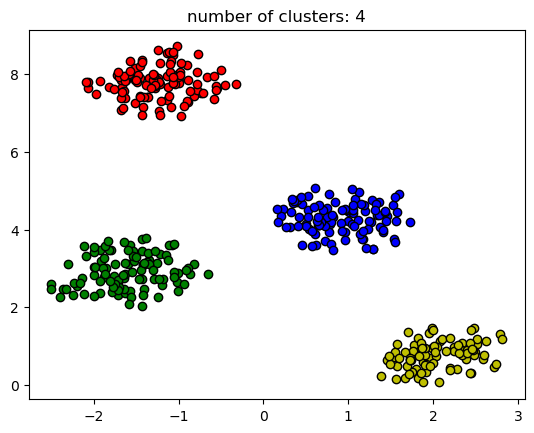

In [4]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# eps: The maximum distance between two samples
# for them to be considered as in the same neighborhood.

# min_samples: The minimum number of samples
# required to form a dense region (a core point).

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# all Flase of the shape of our data
core_samples_mask[db.core_sample_indices_] = True
# maske the core sample to be True and other to be false
labels = db.labels_
#cluster labels assigned to each sample by DBSCAN
# (-1) indcate Noise point

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# - (1 if -1 in labels else 0):
# Subtracts 1 if noise (-1) is present to get the number of
# clusters excluding noise(-1).

# This is dump we can just use this
#n_clusters_ = labels.max() + 1


# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels) # number of clusters
colors = ['y', 'b', 'g', 'r'] # number of coloers

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    #other than Outlier
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
    # Outlier samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


#Step 4 : Evaluation Metrics For DBSCAN Algorithm In Machine Learning


In [5]:
# evaluation metrics
from sklearn import metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(y_true, labels) # Import adjusted_rand_score
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.50
Adjusted Rand Index: 0.70


#**Well Done :)**